In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input/waste-classification-data'):
    for filename in filenames:
        os.path.join(dirname, filename)

2024-02-09 02:58:57.172514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 02:58:57.172637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 02:58:57.478019: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
image_size = [224,224]
train_path = "/kaggle/input/waste-classification-data/"
valid_path = "/kaggle/input/waste-classification-data/"

In [4]:
# Import the Resnet50 architecture
resnet = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('/kaggle/input/waste-classification-data/*')

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = resnet.input, outputs = prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [10]:
model.compile(
loss = 'categorical_crossentropy', 
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
train_data = train_datagen.flow_from_directory('/kaggle/input/waste-classification-data/DATASET/TRAIN', target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 22564 images belonging to 2 classes.


In [13]:
test_data = test_datagen.flow_from_directory('/kaggle/input/waste-classification-data/DATASET/TEST',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2513 images belonging to 2 classes.


In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
MODEL_DIR = "/kaggle/input/waste-classification-data"
if not os.path.exists(MODEL_DIR):  #If the directory does not exist, create it.
    os.makedirs(MODEL_DIR)
checkpoint = ModelCheckpoint(filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"), save_best_only=True) 

In [16]:
r = model.fit_generator(
    train_data,
    validation_data = test_data,
    epochs = 20,
    steps_per_epoch = len(test_data),
    validation_steps = len(test_data)
)

/tmp/ipykernel_34/955266517.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
79/79 [==============================] - 39s 494ms/step - loss: 0.6463 - accuracy: 0.7373 - val_loss: 0.7261 - val_accuracy: 0.7179
Epoch 2/20
79/79 [==============================] - 38s 481ms/step - loss: 0.6848 - accuracy: 0.7373 - val_loss: 0.6603 - val_accuracy: 0.7266
Epoch 3/20
79/79 [==============================] - 39s 493ms/step - loss: 0.5241 - accuracy: 0.7801 - val_loss: 0.6114 - val_accuracy: 0.7437
Epoch 4/20
79/79 [==============================] - 38s 485ms/step - loss: 0.6328 - accuracy: 0.7362 - val_loss: 0.8502 - val_accuracy: 0.6387
Epoch 5/20
79/79 [==============================] - 37s 471ms/step - loss: 0.6290 - accuracy: 0.7444 - val_loss: 0.8103 - val_accuracy: 0.6984
Epoch 6/20
79/79 [==============================] - 38s 483ms/step - loss: 0.6202 - accuracy: 0.7575 - val_loss: 0.7877 - val_accuracy: 0.6697
Epoch 7/20
79/79 [==============================] - 37s 470ms/step - loss: 0.5496 - accuracy: 0.7688 - val_loss: 1.4461 - val_accuracy: 0.5981

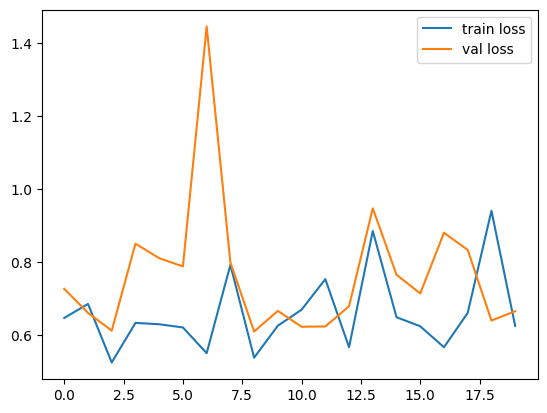

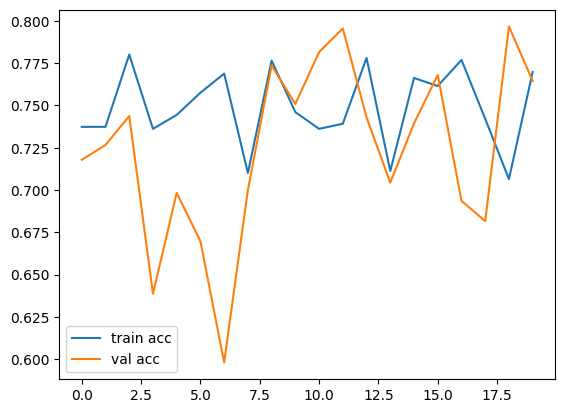

In [17]:
# loss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [19]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# from keras.utils.vis_utils import plot_model
from glob import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [20]:
from tensorflow.keras.models import load_model

model.save('resnet.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
y_pred = model.predict(test_data)
y_pred

79/79 [==============================] - 9s 98ms/step


array([[0.17932707, 0.820673  ],
       [0.6040674 , 0.3959326 ],
       [0.9979292 , 0.00207084],
       ...,
       [0.9722233 , 0.02777676],
       [0.87202126, 0.12797874],
       [0.03400787, 0.96599215]], dtype=float32)

In [23]:
y_pred = np.argmax(y_pred, axis = 1)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model = load_model('resnet.h5')

In [28]:
img = image.load_img('/kaggle/input/waste-classification-data/DATASET/TEST/O/O_12577.jpg', target_size = (224, 224))

In [29]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
result = model.predict(img)

1/1 [==============================] - 2s 2s/step


In [30]:
train_data.class_indices

{'O': 0, 'R': 1}

In [31]:
if(result[0][0] == 1):
    prediction = 'Recyclable'
else:
    prediction = 'Organic'

In [32]:
prediction

'Organic'